We are going to build a SVM to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. 

The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. 

Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. See the article (P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". (Machine Learning Vol 6 No.2 March 91)) for more details.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [3]:
lData = pd.read_csv("letterdata.csv")
lData.head(10) # all fields except the target ("letter") are numeric. We do not know the scale. So normalize

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [15]:
lData.shape

(20000, 17)

## Split Data

In [17]:
X,y = np.array(lData)[ :, 1:17], np.array(lData.letter)[:]   # note for y, extracting all rows of "letter" col

In [18]:
X

array([[2, 8, 3, ..., 8, 0, 8],
       [5, 12, 3, ..., 8, 4, 10],
       [4, 11, 6, ..., 7, 3, 9],
       ...,
       [6, 9, 6, ..., 12, 2, 4],
       [2, 3, 4, ..., 9, 5, 8],
       [4, 9, 6, ..., 7, 2, 8]], dtype=object)

In [19]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [38]:
X_train = X[:16000, :]
X_test = X[16001: , :]
y_train = y[:16000]
y_test = y[16001:]

In [39]:
print('X_train and shape: \n{} \n\n{}\n\n X_test and shape:\n {} \n\n {}\n\n y_train and shape:\n{} \n\n {}\n\n y_test and shape:\n{} \n\n{}\n'.format(X_train,X_train.shape,X_test,X_test.shape,y_train,y_train.shape,y_test,y_test.shape))

X_train and shape: 
[[2 8 3 ... 8 0 8]
 [5 12 3 ... 8 4 10]
 [4 11 6 ... 7 3 9]
 ...
 [8 14 7 ... 7 5 8]
 [4 7 5 ... 8 5 8]
 [2 1 3 ... 9 4 10]] 

(16000, 16)

 X_test and shape:
 [[6 9 8 ... 8 0 8]
 [6 9 8 ... 9 7 10]
 [5 6 6 ... 9 4 8]
 ...
 [6 9 6 ... 12 2 4]
 [2 3 4 ... 9 5 8]
 [4 9 6 ... 7 2 8]] 

 (3999, 16)

 y_train and shape:
['T' 'I' 'D' ... 'G' 'E' 'C'] 

 (16000,)

 y_test and shape:
['N' 'V' 'I' ... 'T' 'S' 'A'] 

(3999,)



## Build Model

In [41]:
from sklearn import svm



In [42]:
clf = svm.SVC(gamma=0.025, C=3)    

gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications. 

In [43]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [45]:
y_pred = clf.predict(X_test)
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [9]:
getAccuracy(y_test , y_pred)   # Calling getAccuracy function instead of usinig array comparison to get the %age accuracy

96.07401850462615

In [46]:
clf.score(X_test,y_test)

0.9744936234058514

In [47]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_pred)

0.9744936234058514

In [48]:
# Compare y_test and y_pred result

In [49]:
y_grid = (np.column_stack([y_test, y_pred]))

In [74]:
print(y_grid)

[['N' 'N']
 ['V' 'V']
 ['I' 'I']
 ...
 ['T' 'T']
 ['S' 'S']
 ['A' 'A']]


In [75]:
#other alternative for stacking
y_grid1=np.vstack((y_test,y_pred))
y_grid1.T

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

### 

In [12]:
#np.savetxt("ocr.csv", y_grid , fmt='%s')

In [84]:
import string
lab= list(string.ascii_uppercase[0:26])
plab=["Predicted "+s for s in lab]

In [85]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [86]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

Filter those cases where the model committed mistake and analyze the mistake, which characters most mistakes occured on?

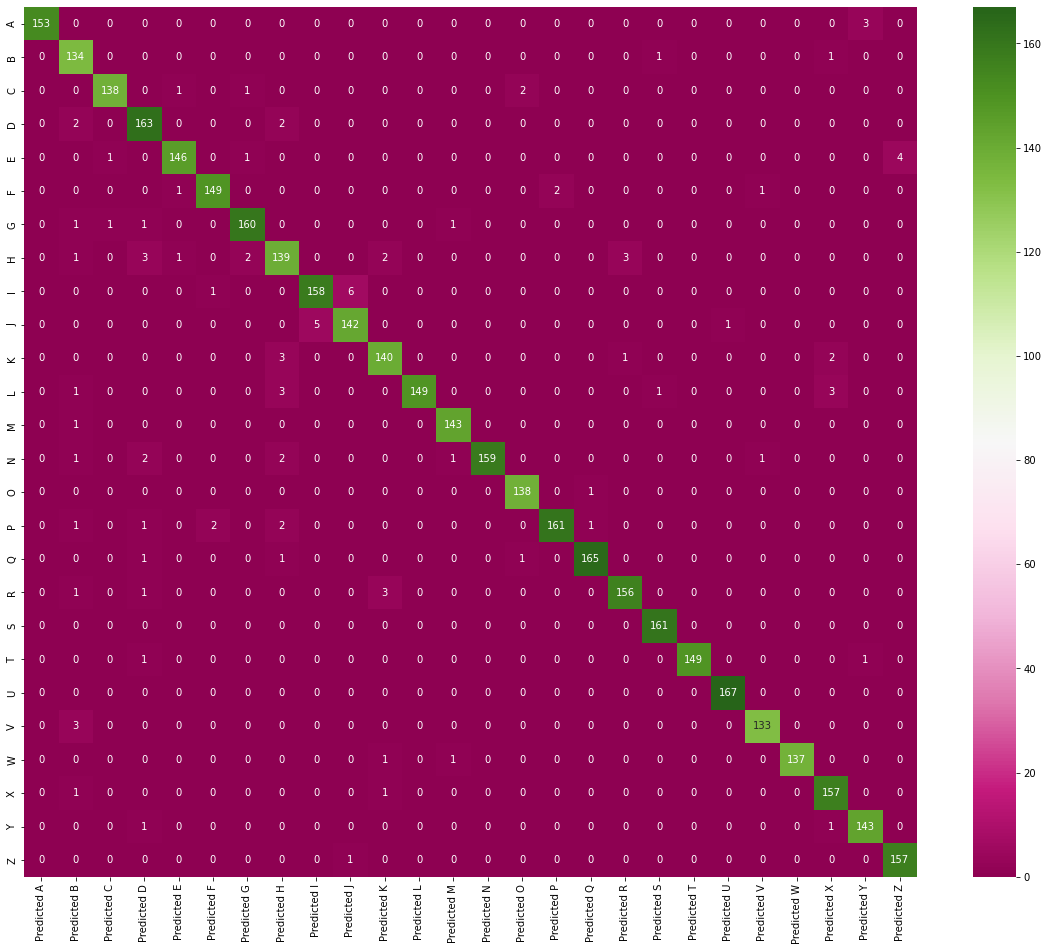

In [90]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(y_test, y_pred, labels=lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab],
                  columns = [i for i in plab])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='PiYG');